In [130]:
import pandas as pd # for data manipulation and analysis
import numpy as np

import seaborn as sns # for data visualization
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # for machine learning
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
df_hourly = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_January_2024_Student_And_Omny.csv')
df_delays = pd.read_csv('MTA_Subway_Trains_Delayed__Beginning_2020_Real.csv')


C:\Users\Wilboopblapp\AppData\Local\Temp\ipykernel_72848\602368244.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hourly = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_January_2024_Student_And_Omny.csv')


Begin preparing datasets by examining their columns

In [3]:
df_hourly.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,11/01/2024 04:00:00 AM,subway,393,116 St (6),Manhattan,omny,OMNY - Full Fare,23,0,40.798630,-73.941620,POINT (-73.94162 40.79863)
1,11/01/2024 06:00:00 AM,subway,458,46 St-Bliss St (7),Queens,omny,OMNY - Full Fare,205,4,40.743134,-73.918434,POINT (-73.918434 40.743134)
2,11/01/2024 07:00:00 AM,subway,272,"36 St (M,R)",Queens,omny,OMNY - Full Fare,39,0,40.752040,-73.928780,POINT (-73.92878 40.75204)
3,11/01/2024 07:00:00 AM,subway,381,Kingsbridge Rd (4),Bronx,omny,OMNY - Full Fare,206,17,40.867760,-73.897170,POINT (-73.89717 40.86776)
4,11/01/2024 08:00:00 AM,subway,66,18 Av (D),Brooklyn,omny,OMNY - Full Fare,243,27,40.607952,-74.001740,POINT (-74.00174 40.607952)


In [4]:
df_hourly.dtypes

transit_timestamp       object
transit_mode            object
station_complex_id      object
station_complex         object
borough                 object
payment_method          object
fare_class_category     object
ridership                int64
transfers                int64
latitude               float64
longitude              float64
Georeference            object
dtype: object

Convert date columns into datetime objects

In [5]:
df_hourly['transit_timestamp'] = pd.to_datetime(df_hourly['transit_timestamp'])
df_hourly.dtypes

transit_timestamp      datetime64[ns]
transit_mode                   object
station_complex_id             object
station_complex                object
borough                        object
payment_method                 object
fare_class_category            object
ridership                       int64
transfers                       int64
latitude                      float64
longitude                     float64
Georeference                   object
dtype: object

In [6]:
print(df_hourly['transit_timestamp'].min())
print(df_hourly['transit_timestamp'].max())

2024-01-01 00:00:00
2024-12-19 23:00:00


Check for null values

In [7]:
df_hourly.isnull().sum()

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64

In [8]:
df_delays.head()

,month,division,line,day_type,reporting_category,subcategory,delays
0,2024-11-01,A DIVISION,1,1,Crew Availability,Crew Availability,50
1,2024-11-01,A DIVISION,1,1,External Factors,External Debris on Roadbed,34
2,2024-11-01,A DIVISION,1,1,Infrastructure & Equipment,Braking,19
3,2024-11-01,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,10
4,2024-11-01,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",72


In [9]:
df_delays.dtypes

month                 object
division              object
line                  object
day_type               int64
reporting_category    object
subcategory           object
delays                 int64
dtype: object

In [182]:
df_delays['month'] = pd.to_datetime(df_delays['month'], errors='coerce')
df_delays.dtypes

month                 datetime64[ns]
division                       int64
line                           int64
day_type                       int64
reporting_category             int64
subcategory                    int64
delays                         int64
dtype: object

In [11]:
df_delays.isnull().sum()

month                    0
division                 0
line                     0
day_type                 0
reporting_category       0
subcategory           2249
delays                   0
dtype: int64

in this dataset we found null values, so we fill those null values instead of dropping them in case they still contain delays that did not have a specific subcategory and we dont lose that data.

In [12]:
df_delays['subcategory'].fillna('Unknown', inplace=True)

C:\Users\Wilboopblapp\AppData\Local\Temp\ipykernel_72848\2284327490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_delays['subcategory'].fillna('Unknown', inplace=True)


In [13]:
df_delays.isnull().sum()

month                 0
division              0
line                  0
day_type              0
reporting_category    0
subcategory           0
delays                0
dtype: int64

In [14]:
print(df_delays['month'].min())
print(df_delays['month'].max())

2020-01-01 00:00:00
2024-11-01 00:00:00


Our delays dataset only contains data for the months January through november, so we should adjust our hourly dataset to match this time frame.

In [95]:
start_date = pd.Timestamp('2024-01-01')
end_date = pd.Timestamp('2024-12-01')
df_hourly = df_hourly[(df_hourly.transit_timestamp >= start_date) & (df_hourly.transit_timestamp < end_date)]

In [18]:
print(df_hourly['transit_timestamp'].min())
print(df_hourly['transit_timestamp'].max())

2024-01-01 00:00:00
2024-11-30 23:00:00


In [19]:
df_daily = pd.read_csv('MTA_Daily_Ridership_Data__Beginning_2020_20250113.csv')

In [20]:
df_daily.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day
0,01/01/2024,1648734,0.79
1,01/02/2024,3290639,0.64
2,01/03/2024,3555082,0.69
3,01/04/2024,3560703,0.69
4,01/05/2024,3263064,0.63


In [21]:
df_daily['Date'] = pd.to_datetime(df_daily['Date'])
df_daily.dtypes


Date                                         datetime64[ns]
Subways: Total Estimated Ridership                    int64
Subways: % of Comparable Pre-Pandemic Day           float64
dtype: object

In [22]:
df_daily.isnull().sum()

Date                                         0
Subways: Total Estimated Ridership           0
Subways: % of Comparable Pre-Pandemic Day    0
dtype: int64

In [23]:
print(df_daily['Date'].min())
print(df_daily['Date'].max())

2024-01-01 00:00:00
2024-12-01 00:00:00


To begin exploring our the data we've prepped, we'll start with investigating ridership data. Our hourly ridership dataset only includes riders that used OMNY and student metrocards. Let's see which stations have the most.

In [25]:
riders_by_station = df_hourly.groupby(['station_complex'])['ridership'].sum().reset_index()
riders_by_station = riders_by_station.sort_values(by='ridership', ascending=False)
riders_by_station.head(10)

,station_complex,ridership
402,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",24998385
282,"Grand Central-42 St (S,4,5,6,7)",20098077
85,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",13752605
26,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",13571259
276,"Fulton St (A,C,J,Z,2,3,4,5)",11115440
88,"34 St-Penn Station (A,C,E)",10895837
111,"59 St-Columbus Circle (A,B,C,D,1)",9403814
87,"34 St-Penn Station (1,2,3)",9219634
322,"Lexington Av-53 St (E,M)/51 St (6)",7426831
223,"Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortla...",7348426


Times square has the most ridership by far with Grand Central behind it as another outlier. 
Next we can investigate which months we have data for have the most ridership. Our daily ridership dataset includes all riders regardless of fare type. 

In [97]:
monthly = df_daily.groupby(df_daily['Date'].dt.to_period('M')).agg({'Subways: Total Estimated Ridership': 'sum'}).reset_index()
print(monthly.sort_values(by='Subways: Total Estimated Ridership', ascending=False))

       Date  Subways: Total Estimated Ridership
9   2024-10                           113310626
4   2024-05                           105903207
8   2024-09                           103578757
10  2024-11                           102553041
3   2024-04                            99951442
2   2024-03                            99865795
5   2024-06                            96761954
6   2024-07                            93987734
7   2024-08                            92307476
0   2024-01                            91711510
1   2024-02                            90325563
11  2024-12                             1893492


Text(0.5, 1.0, 'Total estimated subway ridership by month')

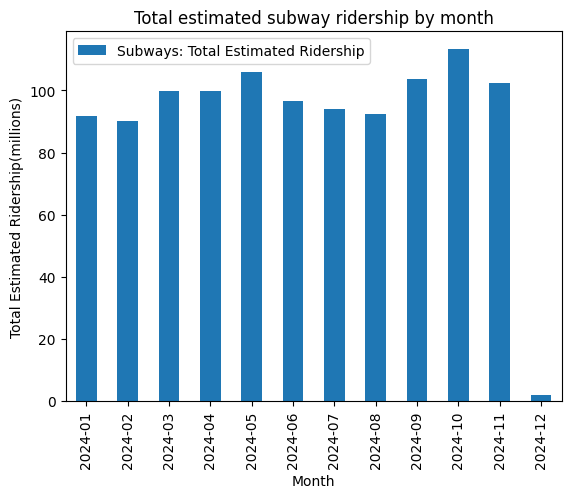

In [27]:
monthly['Subways: Total Estimated Ridership'] = monthly['Subways: Total Estimated Ridership']/1000000
monthly.plot(kind='bar', x='Date', y='Subways: Total Estimated Ridership', xlabel='Month', ylabel='Total Estimated Ridership(millions)')
plt.gca().set_title('Total estimated subway ridership by month')

October has the most ridership. Lets investigate that further, starting with which days saw the most riders.

In [28]:
start_date = pd.Timestamp('2024-10-01')
end_date = pd.Timestamp('2024-11-01')
df_october = df_daily[(df_daily.Date >= start_date) & (df_daily.Date < end_date)]
print(df_october['Date'].min())
print(df_october['Date'].max())

2024-10-01 00:00:00
2024-10-31 00:00:00


In [98]:
print(df_october.sort_values(by='Subways: Total Estimated Ridership', ascending=False))

          Date  Subways: Total Estimated Ridership  \
303 2024-10-30                             4417951   
302 2024-10-29                             4378791   
289 2024-10-16                             4357117   
304 2024-10-31                             4340272   
283 2024-10-10                             4329161   
282 2024-10-09                             4313211   
290 2024-10-17                             4309633   
297 2024-10-24                             4304831   
288 2024-10-15                             4284818   
296 2024-10-23                             4276606   
281 2024-10-08                             4256950   
295 2024-10-22                             4218881   
274 2024-10-01                             4179363   
275 2024-10-02                             4068073   
291 2024-10-18                             4030998   
298 2024-10-25                             4019790   
301 2024-10-28                             3983168   
284 2024-10-11              

Text(0.5, 1.0, 'Total estimated subway ridership by day(october)')

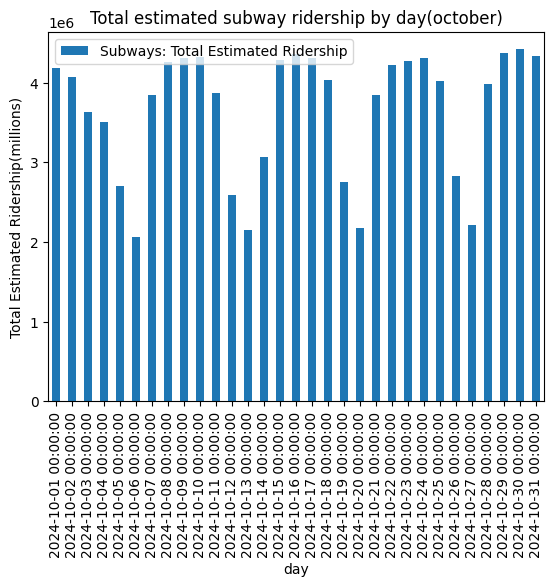

In [30]:
df_october.plot(kind='bar', x='Date', y='Subways: Total Estimated Ridership', xlabel='day', ylabel='Total Estimated Ridership(millions)')
plt.gca().set_title('Total estimated subway ridership by day(october)')

In [31]:
octaverage = df_october['Subways: Total Estimated Ridership'].mean()
octaverage

3655181.4838709678

In October we can see that weekdays have the most riders and the weekend sees ridership nearly half. On average 3.6 million people took the train on any given day. The busiest day was the 30th, using our hourly dataset we can investigate that even further.

In [99]:
start_date = pd.Timestamp('2024-10-30')
end_date = pd.Timestamp('2024-10-31')
df_bestday = df_hourly[(df_hourly.transit_timestamp >= start_date) & (df_hourly.transit_timestamp < end_date)]
print(df_bestday['transit_timestamp'].min())
print(df_bestday['transit_timestamp'].max())

2024-10-30 00:00:00
2024-10-30 23:00:00


In [100]:
df_bestday

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
1697159,2024-10-30 00:00:00,subway,606,"Court Sq (E,G,M,7)",Queens,omny,OMNY - Full Fare,46,4,40.747845,-73.94383,POINT (-73.94383 40.747845)
1697160,2024-10-30 04:00:00,subway,78,Avenue U (N),Brooklyn,omny,OMNY - Full Fare,6,0,40.597473,-73.97913,POINT (-73.97913 40.597473)
1697161,2024-10-30 05:00:00,subway,246,Avenue I (F),Brooklyn,omny,OMNY - Full Fare,5,2,40.625320,-73.97613,POINT (-73.97613 40.62532)
1697164,2024-10-30 19:00:00,subway,118,3 Av (L),Manhattan,omny,OMNY - Full Fare,410,1,40.732850,-73.98612,POINT (-73.98612 40.73285)
1697165,2024-10-30 22:00:00,subway,160,"72 St (C,B)",Manhattan,omny,OMNY - Full Fare,82,2,40.775593,-73.97641,POINT (-73.97641 40.775593)
...,...,...,...,...,...,...,...,...,...,...,...,...
3380314,2024-10-30 11:00:00,subway,295,231 St (1),Bronx,omny,OMNY - Full Fare,97,0,40.878857,-73.90483,POINT (-73.90483 40.878857)
3380315,2024-10-30 11:00:00,subway,375,Cypress Av (6),Bronx,omny,OMNY - Full Fare,24,0,40.805367,-73.91404,POINT (-73.91404 40.805367)
3380316,2024-10-30 04:00:00,subway,214,"182-183 Sts (B,D)",Bronx,omny,OMNY - Full Fare,20,0,40.856094,-73.90074,POINT (-73.90074 40.856094)
3380317,2024-10-30 20:00:00,subway,383,183 St (4),Bronx,omny,OMNY - Full Fare,16,0,40.858406,-73.90388,POINT (-73.90388 40.858406)


Text(0.5, 1.0, 'Total estimated subway ridership by hour (October 30th)')

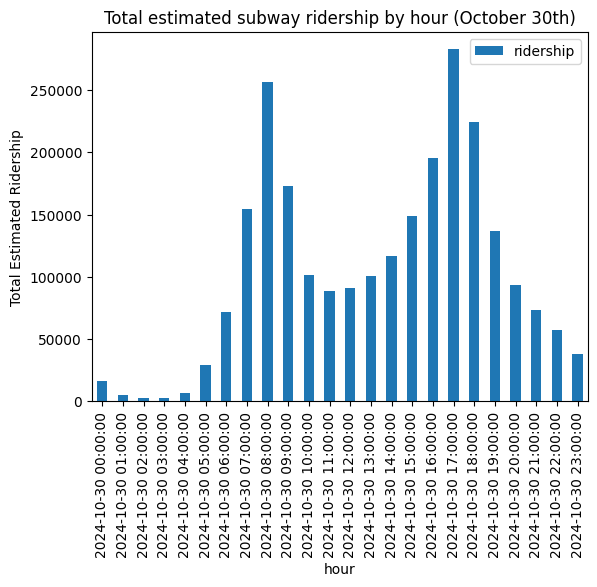

In [106]:
df_bestday = df_bestday.groupby('transit_timestamp')['ridership'].sum().reset_index()
df_bestday.plot(kind='bar', x='transit_timestamp', y='ridership', xlabel='hour', ylabel='Total Estimated Ridership')
plt.gca().set_title('Total estimated subway ridership by hour (October 30th)')

Here we can see that the morning and afternoon see vastly more ridership than any other time of day.
Now that we have an idea of how many people are taking the train, we should investigate the amount of delays the trains have.

In [35]:
total_delays_monthly = df_delays.groupby('month')['delays'].sum().reset_index()
total_delays_monthly


,month,delays
0,2024-01-01,45924
1,2024-02-01,43269
2,2024-03-01,42171
3,2024-04-01,41247
4,2024-05-01,38673
5,2024-06-01,35463
6,2024-07-01,40581
7,2024-08-01,41103
8,2024-09-01,38858
9,2024-10-01,39492


Text(0.5, 1.0, 'Total delays by month')

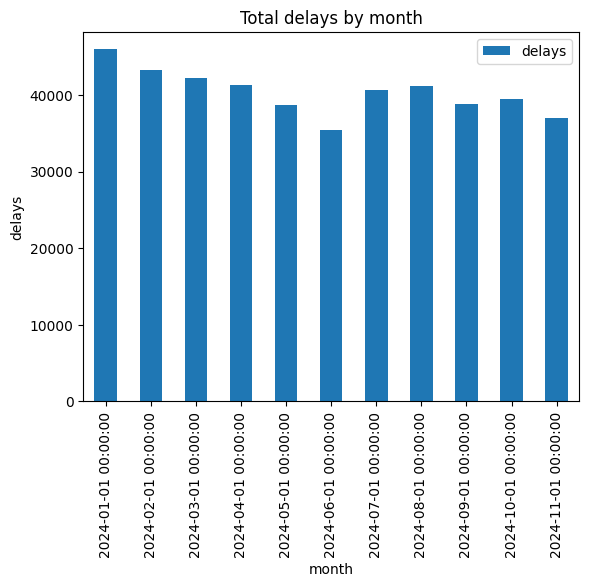

In [36]:
total_delays_monthly.plot(kind='bar', x='month', y='delays', xlabel='month', ylabel='delays')
plt.gca().set_title('Total delays by month')

We can see that January has the most amount of delays, and the amount seems to decrease as the year continues. Lets investigate the amount of delays in October specifically as we can assume the most amount of people would be affected by each individual delay. 

In [37]:
start_date = pd.Timestamp('2024-10-01')
end_date = pd.Timestamp('2024-11-01')

df_delayoct = df_delays[(df_delays.month >= start_date) & (df_delays.month < end_date)]

df_delayoct

,month,division,line,day_type,reporting_category,subcategory,delays
715,2024-10-01,A DIVISION,1,1,Crew Availability,Crew Availability,60
716,2024-10-01,A DIVISION,1,1,External Factors,External Debris on Roadbed,17
717,2024-10-01,A DIVISION,1,1,Infrastructure & Equipment,Braking,20
718,2024-10-01,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,43
719,2024-10-01,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",30
...,...,...,...,...,...,...,...
1405,2024-10-01,B DIVISION,S Rock,1,Planned ROW Work,Subways Maintenance,37
1406,2024-10-01,B DIVISION,S Rock,1,Planned ROW Work,Work Equipment,1
1407,2024-10-01,B DIVISION,S Rock,1,Police & Medical,"Public Conduct, Crime, Police Response",25
1408,2024-10-01,B DIVISION,S Rock,2,External Factors,External Agency or Utility,14


Text(0.5, 1.0, 'Total delays by day type')

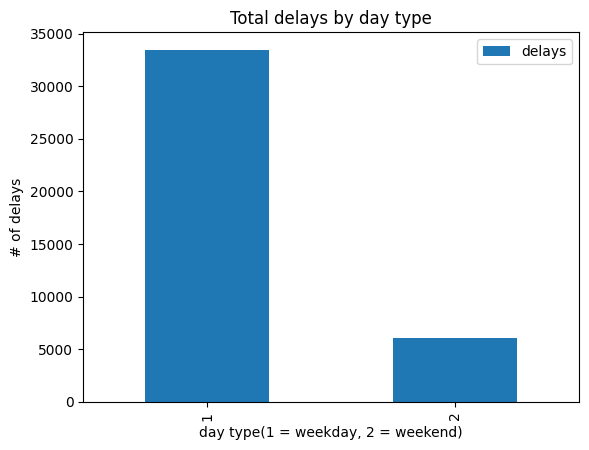

In [112]:
oct_day_type = df_delayoct.groupby('day_type')['delays'].sum().reset_index()
oct_day_type.plot(kind='bar', x='day_type', y='delays', xlabel='day type(1 = weekday, 2 = weekend)', ylabel='# of delays')
plt.gca().set_title('Total delays by day type')

Most delays in october happened during the week rather than on the weekend

In [39]:
total_delays_per_line = df_delays.groupby('line')['delays'].sum().reset_index()
total_delays_per_line = total_delays_per_line.sort_values(by='delays', ascending=False)
print(total_delays_per_line)

      line  delays
5        6   36598
18       N   34284
12       F   34207
1        2   30048
7        A   29872
11       E   25900
0        1   25572
10       D   24625
3        4   22414
9        C   20702
19       Q   20492
20       R   19575
4        5   16921
8        B   16413
6        7   15708
2        3   15248
15      JZ   15080
16       L   13394
17       M   11839
13       G   11606
22  S Rock    1923
14      GS     902
21  S Fkln     434


In [40]:
total_delays_per_lineoct = df_delayoct.groupby('line')['delays'].sum().reset_index()
total_delays_per_lineoct = total_delays_per_lineoct.sort_values(by='delays', ascending=False)
print(total_delays_per_lineoct)

      line  delays
18       N    3106
12       F    3032
5        6    2941
1        2    2446
7        A    2368
10       D    2324
0        1    2299
19       Q    1983
11       E    1968
8        B    1872
20       R    1858
3        4    1850
9        C    1697
15      JZ    1552
13       G    1521
6        7    1506
2        3    1418
4        5    1236
17       M    1208
16       L     914
22  S Rock     236
21  S Fkln     102
14      GS      55


In general, the most delayed train is the 6 train, but in the October it was trumped by the N and F trains. Next, let's examine what types of delays are the most frequent.

In [41]:
total_delay_types = df_delays.groupby(['reporting_category', 'subcategory'])['delays'].sum().reset_index()
total_delay_types = total_delay_types.sort_values(by='delays', ascending=False)
print(total_delay_types)

            reporting_category                             subcategory  delays
22            Planned ROW Work                     Subways Maintenance   90501
25            Police & Medical  Public Conduct, Crime, Police Response   63871
18        Operating Conditions                                 Unknown   44647
8   Infrastructure & Equipment                             Other - Sig   43798
0            Crew Availability                       Crew Availability   33640
24            Police & Medical                      Persons on Roadbed   20910
12  Infrastructure & Equipment                        Rail and Roadbed   19411
26            Police & Medical                   Sick/Injured Customer   15409
19            Planned ROW Work        Capital Work - Other Planned ROW   13673
7   Infrastructure & Equipment                              Other - CE   12293
13  Infrastructure & Equipment                        Service Delivery   12051
16        Operating Conditions             Other Ope

Text(0.5, 1.0, 'Total delays by type')

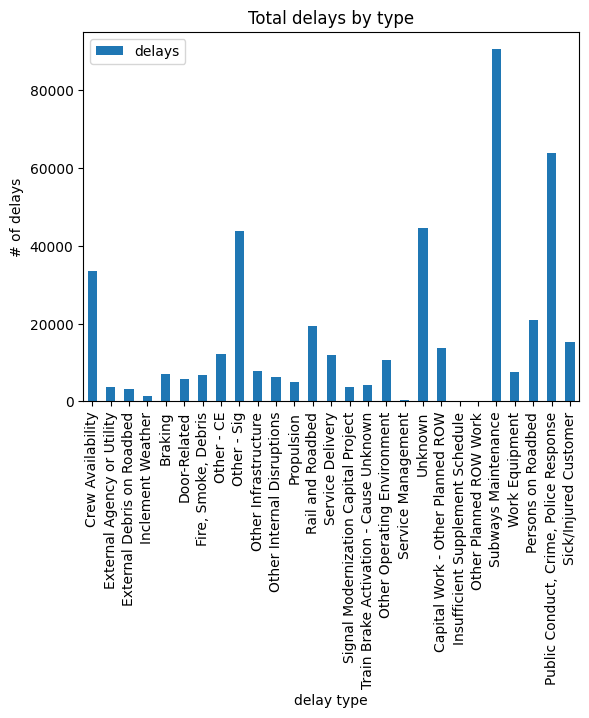

In [42]:
total_delay_types = df_delays.groupby(['reporting_category', 'subcategory'])['delays'].sum().reset_index()
total_delay_types.plot(kind='bar', x='subcategory', y='delays', xlabel='delay type', ylabel='# of delays')
plt.gca().set_title('Total delays by type')

            reporting_category                             subcategory  delays
20            Planned ROW Work                     Subways Maintenance    9470
23            Police & Medical  Public Conduct, Crime, Police Response    7109
7   Infrastructure & Equipment                             Other - Sig    4201
15        Operating Conditions             Other Operating Environment    3366
0            Crew Availability                       Crew Availability    2491
11  Infrastructure & Equipment                        Rail and Roadbed    1559
6   Infrastructure & Equipment                              Other - CE    1340
17            Planned ROW Work        Capital Work - Other Planned ROW    1296
24            Police & Medical                   Sick/Injured Customer    1153
22            Police & Medical                      Persons on Roadbed     977
12  Infrastructure & Equipment                        Service Delivery     946
21            Planned ROW Work                      

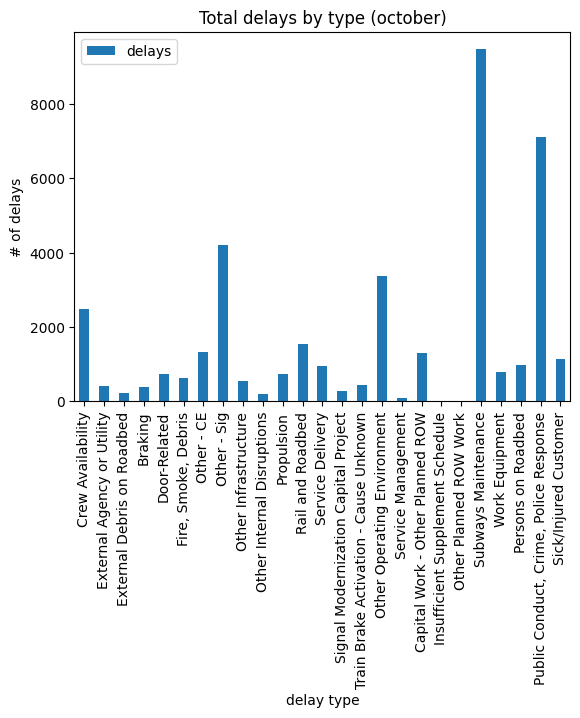

In [43]:
total_delay_typesoct = df_delayoct.groupby(['reporting_category', 'subcategory'])['delays'].sum().reset_index()
total_delay_typesoct.plot(kind='bar', x='subcategory', y='delays', xlabel='delay type', ylabel='# of delays')
plt.gca().set_title('Total delays by type (october)')
total_delay_typesoct = total_delay_typesoct.sort_values(by='delays', ascending=False)
print(total_delay_typesoct)

We can see that planned subway maintenance is the most frequent kind of delay in general and in the month of october. Now that we have explored what we can immediately see in the data, I will perform some predictive analysis on our delay dataset to see how accurately we could predict a delay happening on the subway.

Now we set all columns excluding the 'delays' column to be used as features, and we set the 'delays' column to be our target.

In [247]:
x = df_delays.drop(columns = ['delays'])
y = df_delays['delays']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [248]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Now that our model is trained we will evaluate it and find how accurate it is to the real data.

In [249]:
y_pred = rf_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', round(mae, 2), 'delays.')

r2 = r2_score(y_test, y_pred)
print('R-squared (R2):', round(r2, 2))

mape = mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error:', round(mape, 2))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', round(rmse, 2), 'delays')

accuracy = 100 - mape
print('Model Accuracy:', round(accuracy, 2), '%')


Mean Absolute Error: 23.62 delays.
R-squared (R2): 0.76
Mean Absolute Percentage Error: 2.1
Root Mean Squared Error (RMSE): 42.62 delays
Model Accuracy: 97.9 %


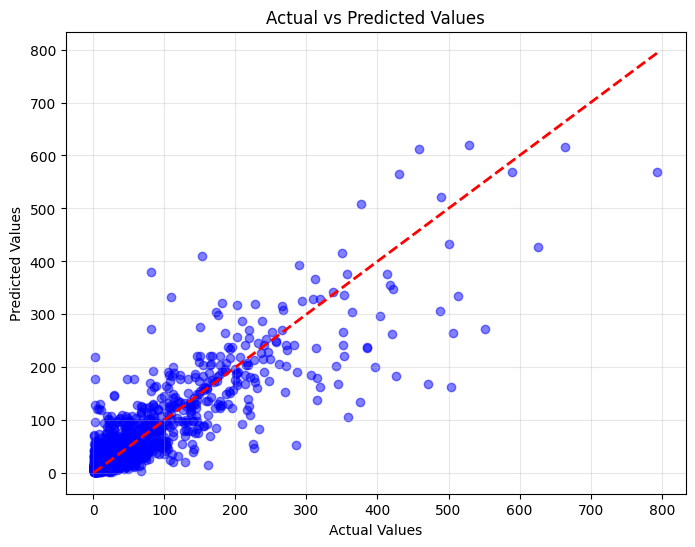

In [250]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)  # y=x line for reference
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(alpha=0.3)
plt.show()

We find that our model has an R-squared value of 76%, so our model fits the data well. Based on our Mean Absolute Errors and Mean Absolute Percentage Errors, we can see that the prediction is on average 23 delays different from the actual amount of delays in either direction. That is a difference of 2.1%, so our model is 97.9% accurate. Now that we know our model is accurate, we should investigate which features were most important to the target.

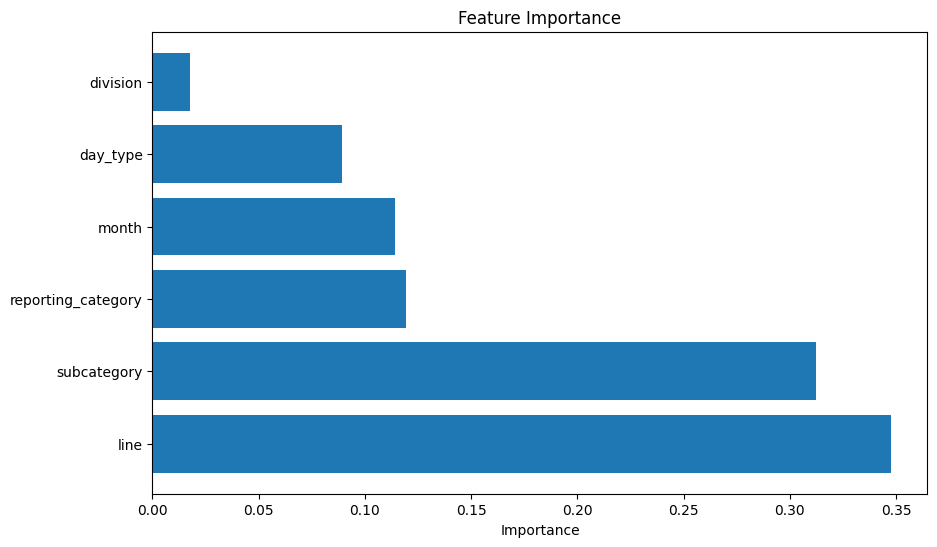

In [251]:
feature_importances = rf_model.feature_importances_
feature_names = x_train.columns

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(feature_importances)), feature_importances[indices], align="center")
plt.yticks(range(len(feature_importances)), feature_names[indices])
plt.xlabel("Importance")
plt.show()

In [252]:
sorted_feature_names = feature_names[indices]
sorted_feature_importances = feature_importances[indices]

feature_importance_list = list(zip(sorted_feature_names, sorted_feature_importances))

for feature, importance in feature_importance_list:
    print(f"{feature}: {importance}")

line: 0.34740117826206157
subcategory: 0.31241540407059926
reporting_category: 0.11910825114256748
month: 0.11410006627942154
day_type: 0.089383307085363
division: 0.01759179315998704


We can see that the specific train line is the most important feature to the amount of delays, followed closely by the subcategory of delay type. Totaling over 65% of the combined feature importance. For further predictions I would like to create another model, but this time use it to predict the category of delay by using a random forest classifier.

In [253]:
x = df_delays.drop(columns=['delays', 'reporting_category'])
y_classifier = df_delays['reporting_category']  # Target for classification

x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x, y_classifier, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

We Evaluate the model using a confusion matrix and other metrics.

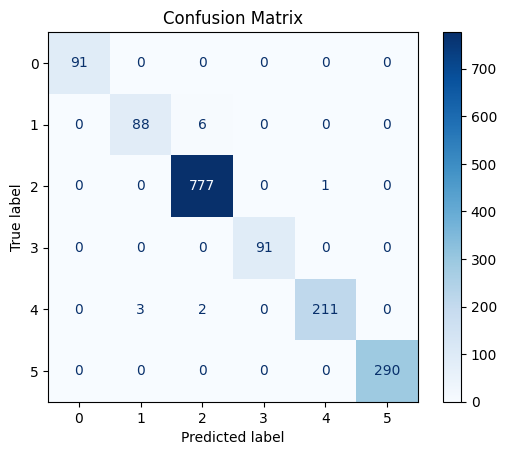

In [254]:
y_pred = clf.predict(x_test_clf)

cm = confusion_matrix(y_test_clf, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [255]:
accuracy = accuracy_score(y_test_clf, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9923076923076923


The model is nearly 100% accurate in predicting a delays category.